In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [7]:
qadf = pd.read_csv('res_qa.csv')

# Compare models by spacy similarity score

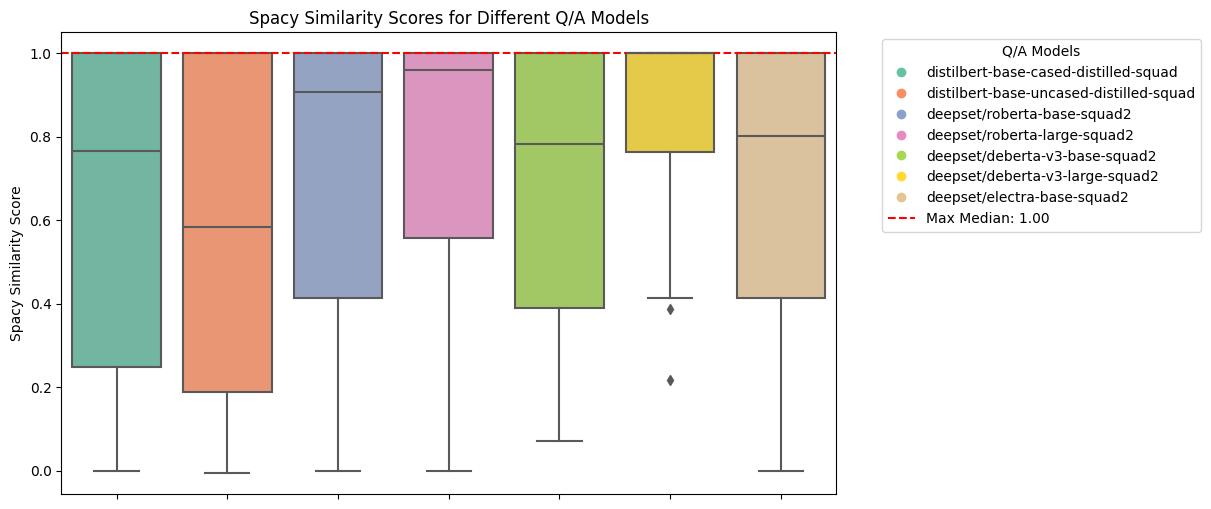

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

palette = sns.color_palette('Set2', n_colors=len(qadf['qa_model'].unique()))
bp = sns.boxplot(x='qa_model', y='spacy_sim', data=qadf, palette=palette)

# Add horizontal line for max median
max_median = qadf.groupby('qa_model')['spacy_sim'].median().max()
plt.axhline(y=max_median, color='red', linestyle='--', label=f'Max Median: {max_median:.2f}')

plt.title('Spacy Similarity Scores for Different Q/A Models')
plt.ylabel('Spacy Similarity Score')
bp.set_xticklabels([])
bp.set_xlabel(None)

legend_labels = {model: color for model, color in zip(qadf['qa_model'].unique(), palette)}
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=model) for model, color in legend_labels.items()]
handles.append(plt.Line2D([0], [0], color='red', linestyle='--', label=f'Max Median: {max_median:.2f}'))
plt.legend(title='Q/A Models', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.annotate(f'Max Median: {max_median:.2f}', xy=(0.5, max_median), xytext=(0.5, max_median + 0.1),
#              arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


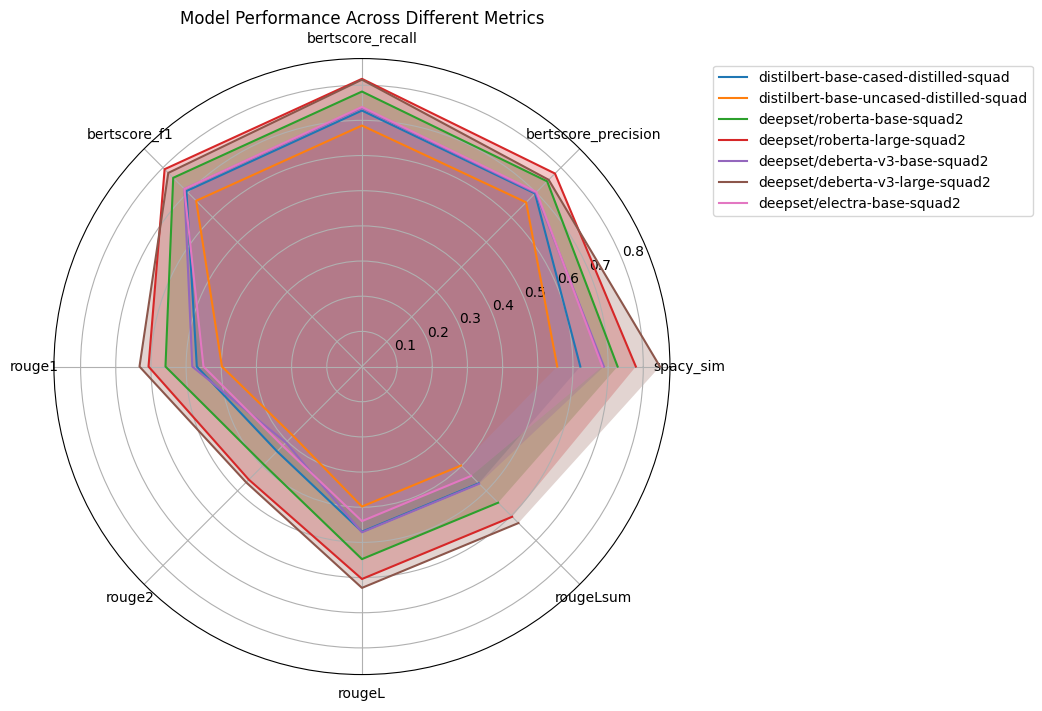

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
metrics = ['spacy_sim', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']
models = qadf['qa_model'].unique()

# Create a radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Number of metrics
num_metrics = len(metrics)

for model in models:
    values = qadf[qadf['qa_model'] == model][metrics].mean().values
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

    # Plot
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.25)

# Set the number of labels and their positions
ax.set_thetagrids(angles * 180/np.pi, labels=metrics)

ax.set_title('Model Performance Across Different Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()


# Compare Spacy similarity scores for each question-answer pair across different models.

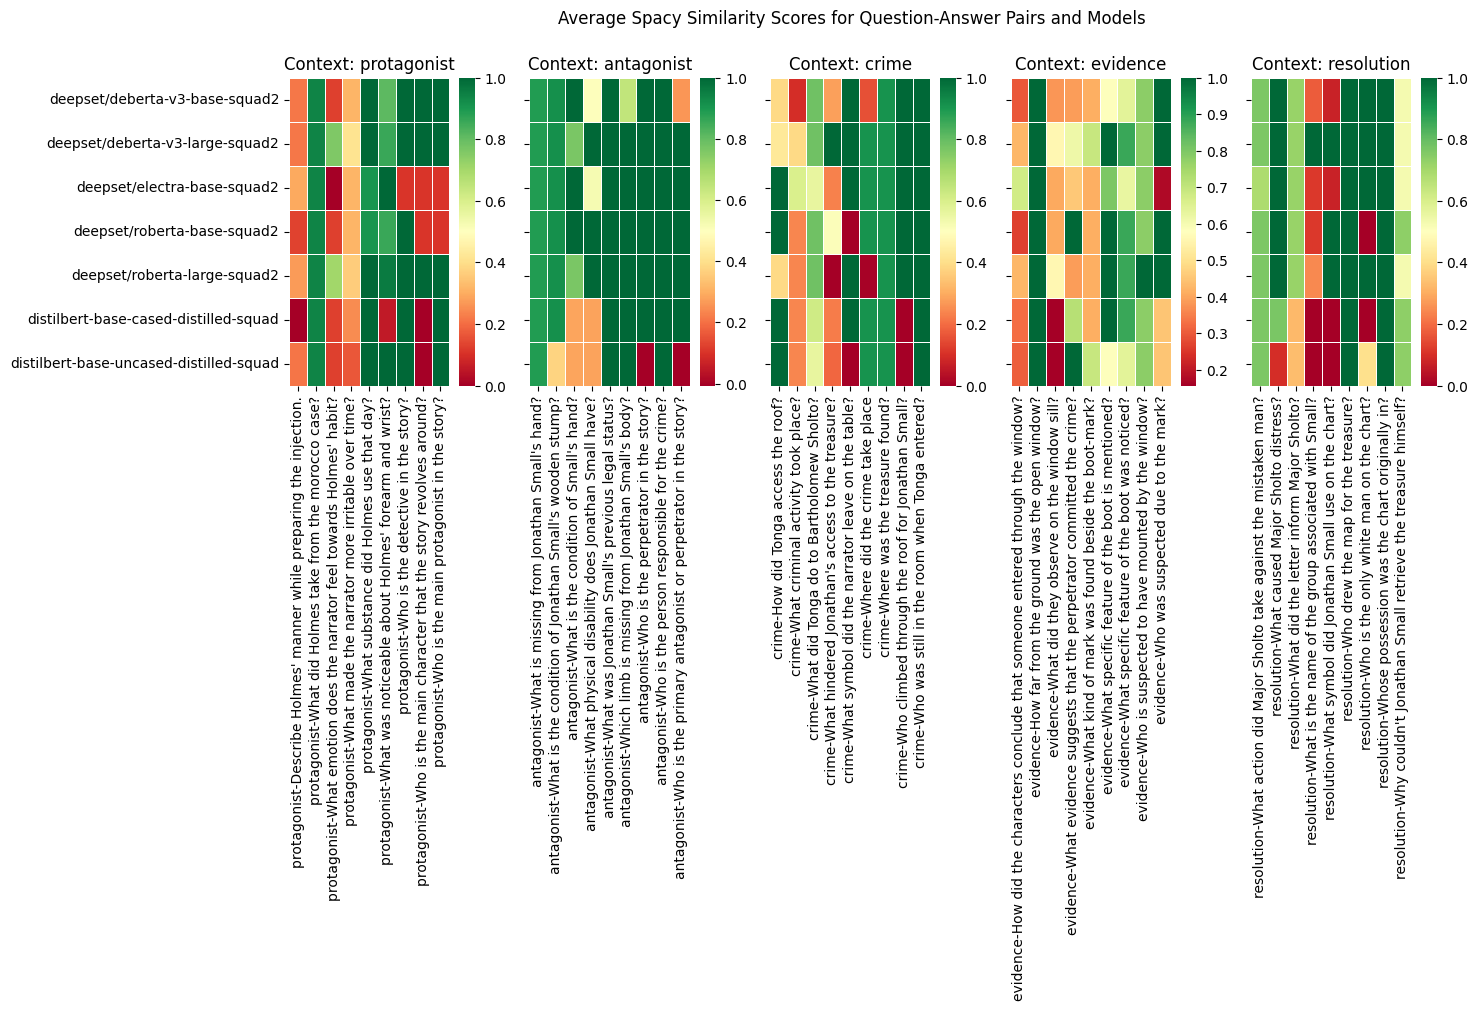

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming qadf is your DataFrame

# Step 1: Create a pivot table
pivot_df = qadf.pivot_table(index='qa_model', columns=['ctx_name', 'q_text'], values='spacy_sim', aggfunc='mean')

# Step 2: Get unique contexts
unique_contexts = qadf['ctx_name'].unique()

# Step 3: Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(unique_contexts), figsize=(15, 4), sharey=True)

# Step 4: Plot individual heatmaps for each context
for i, context in enumerate(unique_contexts):
    context_columns = [(context, q_text) for q_text in pivot_df.columns.get_level_values('q_text') if (context, q_text) in pivot_df.columns]
    sns.heatmap(pivot_df[context_columns], cmap='RdYlGn', fmt=".2f", linewidths=.5, ax=axes[i])
    axes[i].set_title(f'Context: {context}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Common y-axis label
# fig.text(0, 0.5, 'QA Models', va='center', rotation='vertical', fontsize=12)

# Common title
fig.suptitle('Average Spacy Similarity Scores for Question-Answer Pairs and Models', y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


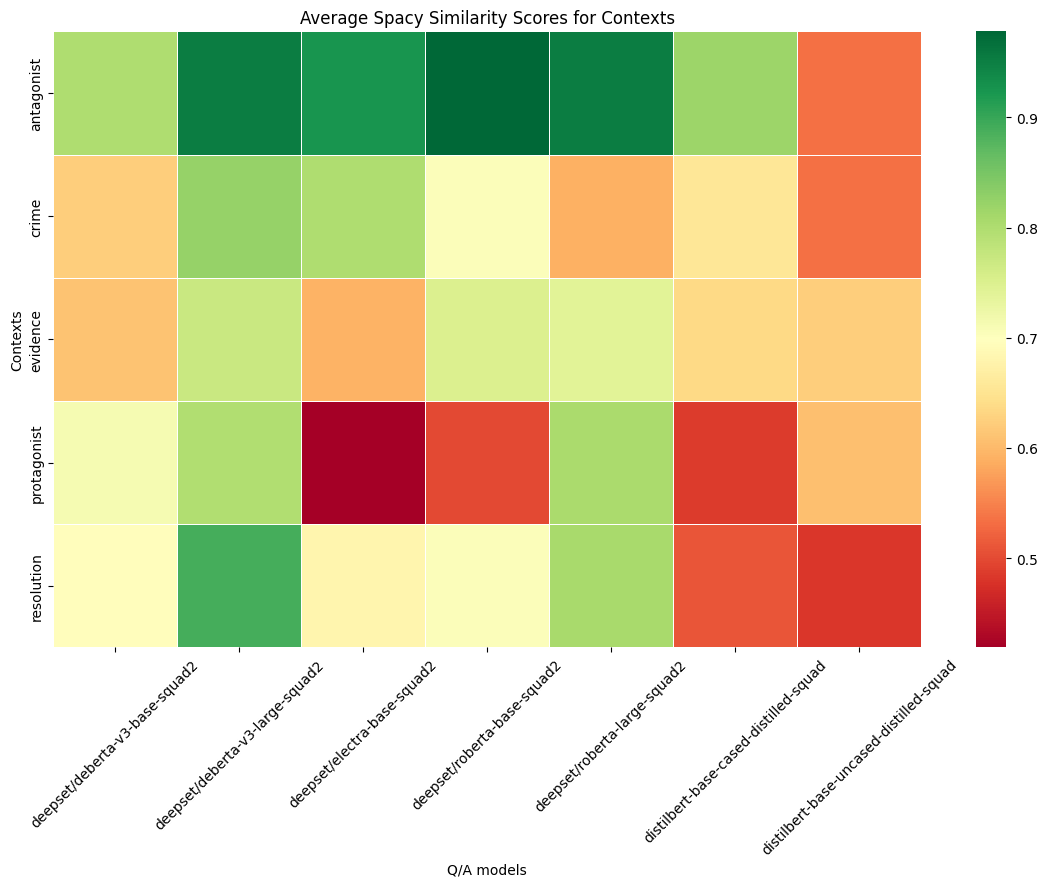

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = qadf.groupby(['ctx_name', 'qa_model'])['spacy_sim'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='RdYlGn', fmt=".2f", linewidths=.5)
plt.title('Average Spacy Similarity Scores for Contexts')
plt.xlabel('Q/A models')
plt.xticks(rotation=45)
plt.ylabel('Contexts')
plt.show()
